In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from metaflow import Flow, get_metadata
from matplotlib import pyplot as plt

np.set_printoptions(suppress=True)

In [295]:
run = Flow('TraderFlow').latest_successful_run
data = run.data.stocks
data

{'^GSPC': {'train': {'seq': array([[ 5.07860551, -1.11645784, -2.75537602, ...,  0.38989497,
            1.30128182, -0.39839547],
          [-1.11645784, -2.75537602, -0.19086756, ...,  1.30128182,
           -0.39839547,  0.03875458],
          [-2.75537602, -0.19086756,  0.39541853, ..., -0.39839547,
            0.03875458,  1.18055266],
          ...,
          [ 0.49563163,  1.03536202, -0.10722513, ..., -0.40549719,
            0.68579979, -0.00148847],
          [ 1.03536202, -0.10722513, -0.98389248, ...,  0.68579979,
           -0.00148847,  0.01350404],
          [-0.10722513, -0.98389248, -1.12908311, ..., -0.00148847,
            0.01350404, -0.12300672]]),
   'price': array([1283.27, 1347.56, 1333.34, ..., 1213.45, 1213.55, 1211.92])},
  'test': {'seq': array([[-0.77084101, -1.10146533, -0.33448003, ..., -0.06066944,
            0.77338762,  0.28415831],
          [-1.10146533, -0.33448003,  0.33308125, ...,  0.77338762,
            0.28415831, -0.93812587],
          [-0.

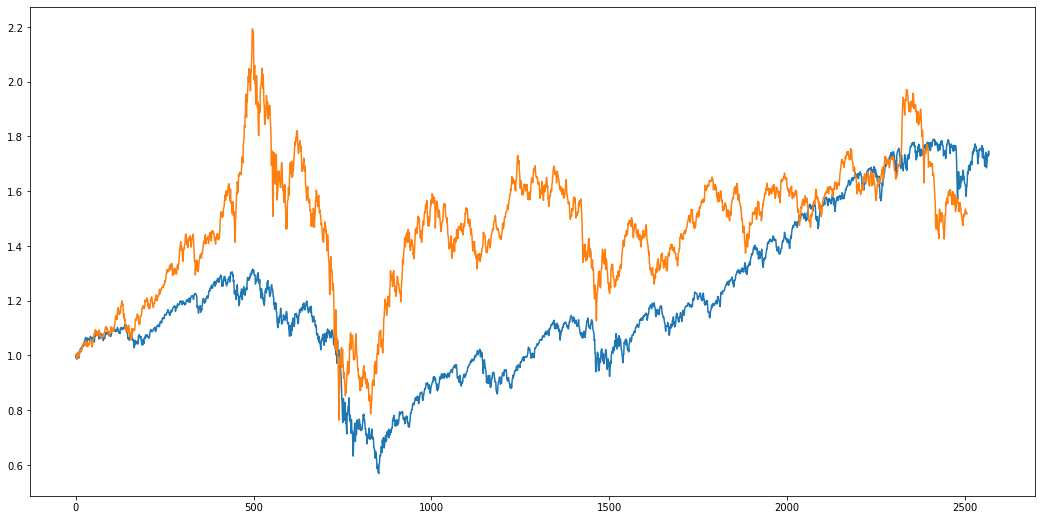

In [65]:
plt.figure(figsize=(18,9))

start = data['^GSPC']['test_raw'][0]
end = data['^GSPC']['test_raw'][-1]

plt.plot(data['^GSPC']['test_raw'] / start);

start = data['^HSI']['test_raw'][0]
end = data['^HSI']['test_raw'][-1]

plt.plot(data['^HSI']['test_raw'] / start);

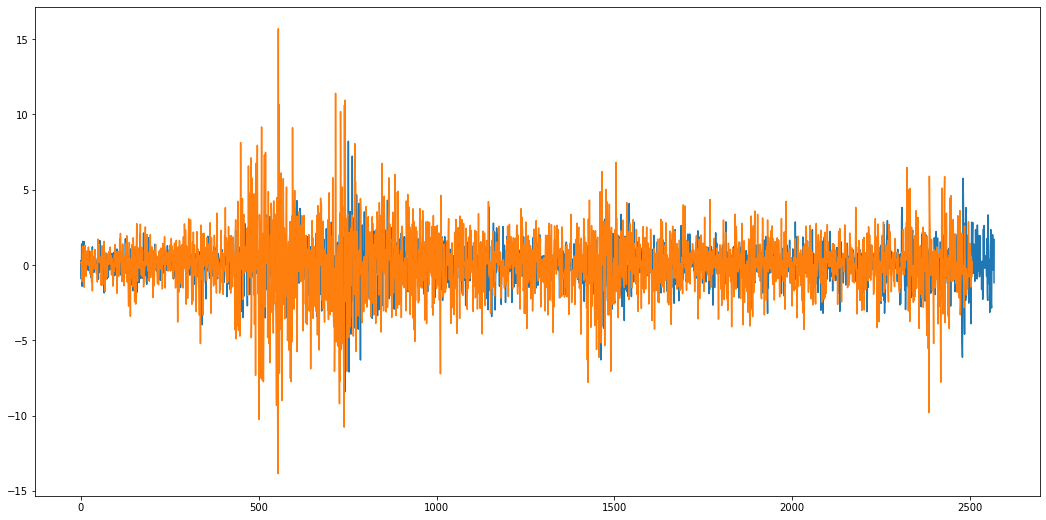

In [64]:
plt.figure(figsize=(18,9))
plt.plot(data['^GSPC']['test'][:,-1]);
plt.plot(data['^HSI']['test'][:,-1]);

1.5192084786840516


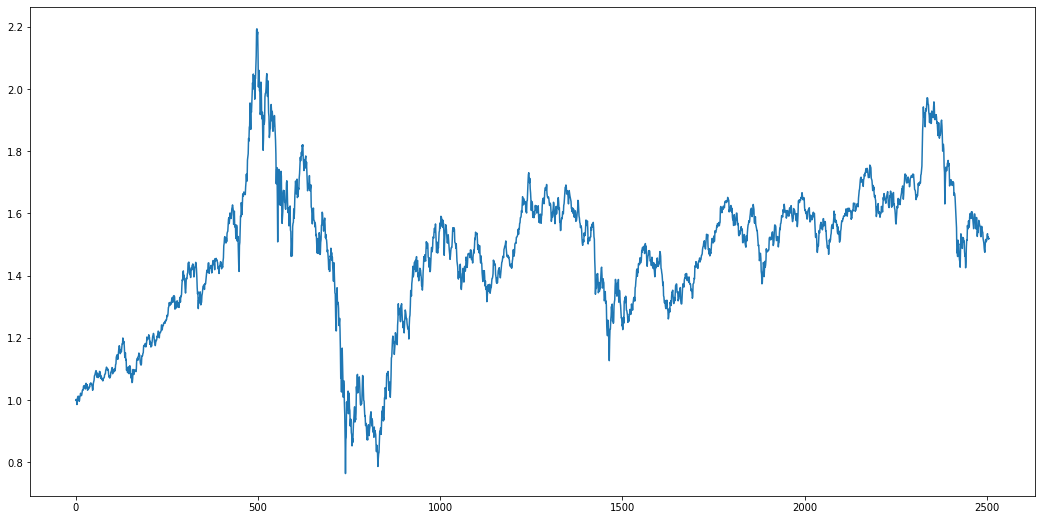

In [41]:
plt.figure(figsize=(18,9))

start = data['^HSI']['test_raw'][0]
end = data['^HSI']['test_raw'][-1]

print(end / start)

plt.plot(data['^HSI']['test_raw'] / start);

In [38]:
with open(f'data/logs.pkl', 'rb') as handle:
    logs = pickle.load(handle)
    
np.array(logs['portfolio']).shape

(10, 803)

In [85]:
colors[0]

'rgb(243, 203, 211)'

In [129]:
def plot_spread(array, title, xlabel, ylabel):
    mean = smooth(np.mean(array, 0), 20)
    std = smooth(np.std(array, 0), 20)

    fig = go.Figure()

    colors = plotly.colors.sequential.Magenta

    upper_bound = go.Scatter(x=list(range(len(mean))), 
                             y=mean+std,
                             mode='lines',
                             fillcolor='rgba(0, 138, 196, 0.1)',
                             fill='tonexty',
                             line=dict(width=0),
                             hoverinfo='skip')

    trace = go.Scatter(x=list(range(len(mean))), 
                             y=mean,
                             mode='lines',
                             fillcolor='rgba(0, 138, 196, 0.1)',
                             fill='tonexty',
                             line=dict(color='#008ac4', width=2))

    lower_bound = go.Scatter(x=list(range(len(mean))), 
                             y=mean-std,
                             mode='lines',
                             line=dict(width=0),
                             hoverinfo='skip')

    data = [lower_bound, trace, upper_bound]

    layout = go.Layout(
        title_x=0.5,
        xaxis=dict(title=xlabel),
        yaxis=dict(title=ylabel),
        title=title,
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)

    return fig

In [130]:
plot_spread(np.array(logs['portfolio']), 
        title='Spread of different runs', 
        xlabel='Step', 
        ylabel='Portfolio value')

In [136]:
import plotly
from math import floor
import pickle
import plotly.graph_objects as go
from scipy.signal import savgol_filter

def smooth(y, factor):
    box = np.ones(factor)/factor
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth[:-(factor//2)]

def plot_runs(log_file='logs', train_test='train'):
    with open(f'data/{log_file}.pkl', 'rb') as handle:
        logs = pickle.load(handle)
        
    fig = go.Figure()
    
    hold       = smooth(logs['hold'][200:], 20)
    portfolios = logs['portfolio']

    for run, portfolio in enumerate(portfolios):
        scale = run / len(portfolios)
        
        portfolio = smooth(portfolio, 20)
        
        fig.add_trace(go.Scatter(x=list(range(len(portfolio))), 
                                 y=portfolio,
                                 mode='lines',
                                 line=dict(color=f'rgba(0, 138, 196, {scale + .2})'),
                                 name=f'Run {run+1}'))
        
    fig.add_trace(go.Scatter(x=list(range(len(hold))), 
                             y=hold,
                             mode='lines',
                             line=dict(color='#ff8a00', width=3),
                             name=f'Original'))
    
    fig.update_layout(
        xaxis=dict(title='Step'),
        yaxis=dict(title='Portfolio value ($)'),
        title='Portfolio value of different runs',
        title_x=0.5,
        showlegend = False)
    
    fig.show()
    
    fig = plot_spread(np.array(logs['portfolio']), 
            title='Spread of different runs', 
            xlabel='Step', 
            ylabel='Portfolio value ($)')
    
    fig.add_trace(go.Scatter(x=list(range(len(hold))), 
                             y=hold,
                             mode='lines',
                             line=dict(color='#ff8a00', width=3),
                             name=f'Original'))
    
    fig.show()
    
plot_runs('logs')

In [149]:
plot_runs('logs')

In [150]:
plot_runs('logs-test')

In [143]:
with open(f'data/logs.pkl', 'rb') as handle:
    logs = pickle.load(handle)

In [145]:
logs['hold']

array([ 21.82,  11.98,  -2.05, ..., 866.4 , 888.26, 873.26])

In [148]:
logs['hold'][-1] / np.std(logs['hold'])

2.608520493272381